In [121]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn
import pandas as pd
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (12., 12.0)

Download Txt GRID DATA
http://services.swpc.noaa.gov/text/aurora-nowcast-map.txt

In [5]:
ls Data/

aurora-nowcast-map.txt  sampleData.txt


In [7]:
aurora=np.loadtxt('Data/aurora-nowcast-map.txt')

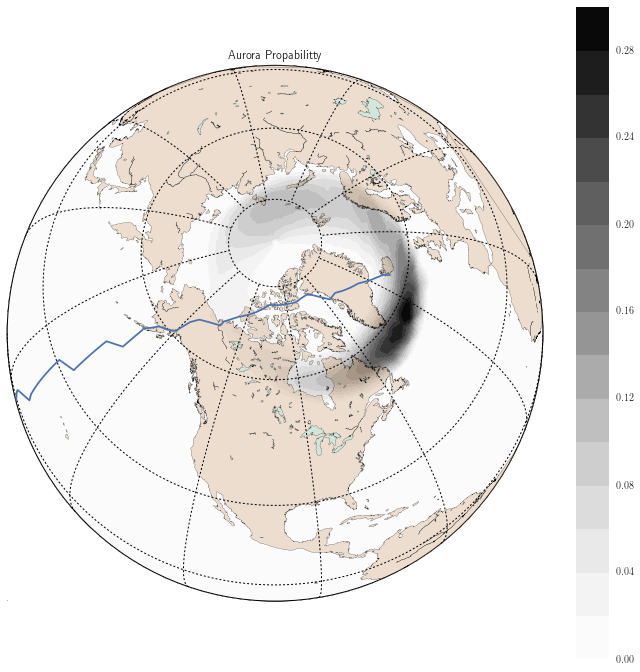

In [129]:
m = Basemap(projection='ortho',lat_0=70,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
m.drawcoastlines(linewidth=0.2)
#m.drawcountries(linewidth=0.2)
m.fillcontinents(color='#cc9966',lake_color='#99ffff',alpha=0.3)
# draw the edge of the map projection region (the projection limb)
m.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 512
nlons = 1024
delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])

# compute native map projection coordinates of lat/lon grid.
x, y = m(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = m.contourf(x,y,aurora/100.,15,linewidths=1.5)
m.plot(lon,lat,latlon=True)
fl=m.plot(lat,lon,)
plt.colorbar(cs)
plt.title('Aurora Propabilitty')
plt.show()

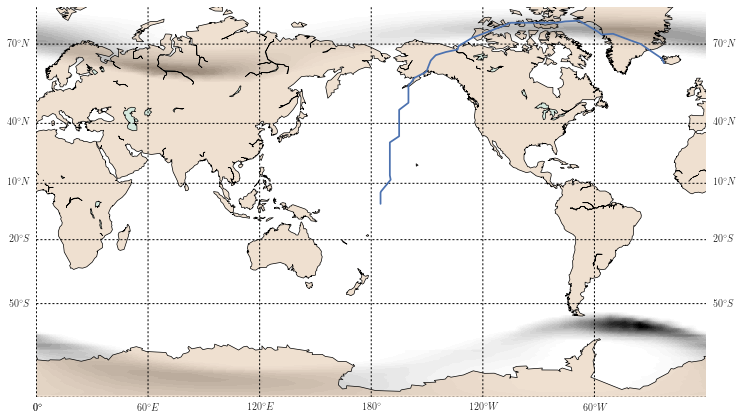

In [128]:
nlats = 512
nlons = 1024
lats=np.linspace(-90,90,nlats)
lons=np.linspace(0,360,nlons)
#m = Basemap(projection='ortho',lat_0=70,lon_0=-100,resolution='l')
m=Basemap(llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80,projection='mill')
m.drawcoastlines(linewidth=0.7)
m.fillcontinents(color='#cc9966',lake_color='#99ffff',alpha=0.3)
m.drawparallels(np.arange(-80,81,30),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])
#m.contourf(lats,lons,aurora)
m.imshow(aurora)
m.plot(lon,lat,latlon=True)

In [42]:
#flight=pd.read_csv('Data/BIKF-NZAA.csv')
flight=np.loadtxt('Data/BIKF-NZAA.csv',delimiter=',',dtype=str)

In [69]:
lat=flight[:,3].astype(float)[:100]
lon=flight[:,4].astype(float)[:100]

In [114]:
lats

array([-90.        , -89.64774951, -89.29549902, -88.94324853,
       -88.59099804, -88.23874755, -87.88649706, -87.53424658,
       -87.18199609, -86.8297456 , -86.47749511, -86.12524462,
       -85.77299413, -85.42074364, -85.06849315, -84.71624266,
       -84.36399217, -84.01174168, -83.65949119, -83.3072407 ,
       -82.95499022, -82.60273973, -82.25048924, -81.89823875,
       -81.54598826, -81.19373777, -80.84148728, -80.48923679,
       -80.1369863 , -79.78473581, -79.43248532, -79.08023483,
       -78.72798434, -78.37573386, -78.02348337, -77.67123288,
       -77.31898239, -76.9667319 , -76.61448141, -76.26223092,
       -75.90998043, -75.55772994, -75.20547945, -74.85322896,
       -74.50097847, -74.14872798, -73.7964775 , -73.44422701,
       -73.09197652, -72.73972603, -72.38747554, -72.03522505,
       -71.68297456, -71.33072407, -70.97847358, -70.62622309,
       -70.2739726 , -69.92172211, -69.56947162, -69.21722114,
       -68.86497065, -68.51272016, -68.16046967, -67.80

In [113]:
lat

array([ 63.98161213,  65.55583333,  66.        ,  68.        ,
        70.        ,  71.        ,  72.        ,  73.        ,
        72.792611  ,  73.733333  ,  76.542419  ,  76.35      ,
        76.        ,  76.        ,  76.        ,  76.        ,
        76.        ,  76.        ,  75.        ,  74.        ,
        73.        ,  72.        ,  71.99144444,  69.434444  ,
        68.32611111,  67.57111111,  66.58002778,  66.57426667,
        66.380453  ,  66.227742  ,  66.018847  ,  65.225094  ,
        64.80008333,  64.437744  ,  64.049344  ,  63.280894  ,
        62.271883  ,  61.56945556,  61.15081   ,  61.055342  ,
        60.7281    ,  60.61469444,  60.223008  ,  59.576208  ,
        58.737167  ,  57.683086  ,  57.482117  ,  57.129833  ,
        56.95427778,  56.787467  ,  56.675511  ,  55.5982    ,
        55.        ,  54.        ,  53.        ,  52.        ,
        51.        ,  50.        ,  49.        ,  46.        ,
        45.        ,  44.        ,  43.        ,  42.  

In [63]:
from scipy import interpolate

In [65]:
interpolate.interp2d(lat,lon,aurora)

ValueError: Invalid length for input z for non rectangular grid

In [89]:
lats

array([[ 1.57079633,  1.57079633,  1.57079633, ...,  1.57079633,
         1.57079633,  1.57079633],
       [ 1.56465441,  1.56465441,  1.56465441, ...,  1.56465441,
         1.56465441,  1.56465441],
       [ 1.55851248,  1.55851248,  1.55851248, ...,  1.55851248,
         1.55851248,  1.55851248],
       ..., 
       [-1.55544152, -1.55544152, -1.55544152, ..., -1.55544152,
        -1.55544152, -1.55544152],
       [-1.56158345, -1.56158345, -1.56158345, ..., -1.56158345,
        -1.56158345, -1.56158345],
       [-1.56772537, -1.56772537, -1.56772537, ..., -1.56772537,
        -1.56772537, -1.56772537]])

In [101]:
y[-1]

array([  1.00000000e+30,   1.00000000e+30,   1.00000000e+30, ...,
         1.00000000e+30,   1.00000000e+30,   1.00000000e+30])

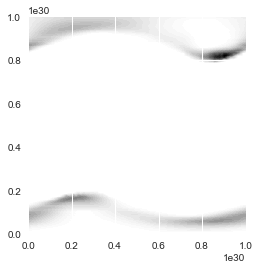

In [95]:
plt.imshow(aurora,extent=[x[0][0],x[-1][-1],y[0][0],y[-1][-1]])

In [91]:
lon

array([ -22.61456272,  -23.95305556,  -25.        ,  -30.        ,
        -35.        ,  -40.        ,  -45.        ,  -50.        ,
        -56.146019  ,  -58.583333  ,  -68.239219  ,  -75.833333  ,
        -80.        ,  -85.        ,  -90.        ,  -95.        ,
       -100.        , -105.        , -110.        , -115.        ,
       -120.        , -125.        , -125.31436111, -133.017222  ,
       -133.59277778, -139.84638889, -145.21275   , -145.27666944,
       -145.598136  , -145.847367  , -146.182372  , -147.396783  ,
       -148.01197222, -148.254967  , -148.508236  , -148.988211  ,
       -149.579208  , -149.96714444, -150.206556  , -150.38559   ,
       -150.947547  , -151.19525   , -152.460967  , -154.410258  ,
       -156.778308  , -157.909797  , -158.116953  , -158.473706  ,
       -158.64755556, -158.84785   , -158.980419  , -160.209292  ,
       -160.        , -160.        , -160.        , -160.        ,
       -160.        , -160.        , -160.        , -165.     

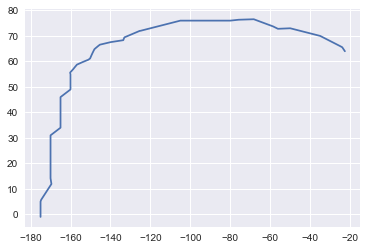

In [70]:
plt.plot(lon,lat)